In [25]:
!pip install shap

In [27]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.metrics import mean_squared_error
# загрузка набора данных
housing = fetch_california_housing()
X, y = housing.data, housing.target
X = pd.DataFrame(X, columns=housing.feature_names)
# подготовка признаков
X = X.drop(['Population', 'AveBedrms', 'AveOccup'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучение модели XGBoost
from xgboost import XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100, random_state=0)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [44]:
y_pred = model.predict(X_test)

In [30]:
X_test.iloc[1,]

,10101
MedInc,5.779600
HouseAge,32.000000
AveRooms,6.107226
Latitude,33.920000
Longitude,-117.970000


In [31]:
y_pred[1]

np.float32(2.6306314)

In [45]:
mse = mean_squared_error(y_test,y_pred)

In [46]:
print(mse)

0.22555937035337223


In [21]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

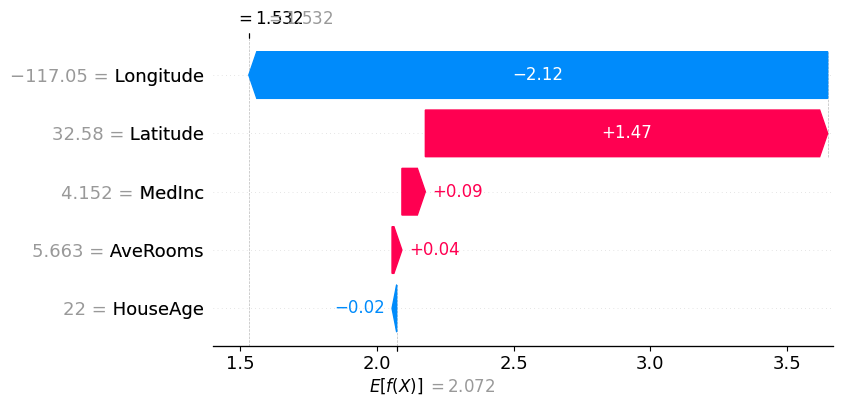

In [22]:
shap.plots.waterfall(shap_values[0])

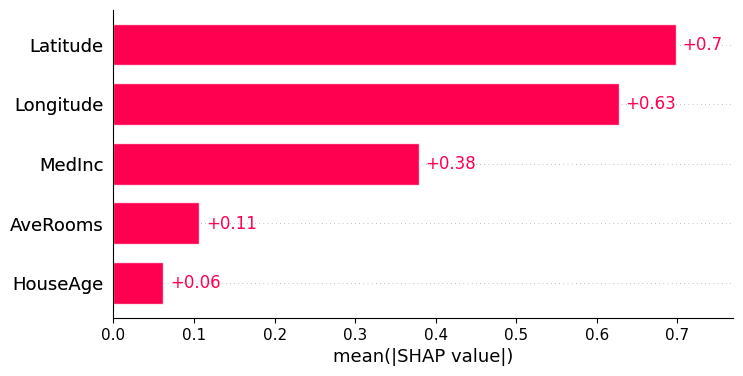

In [47]:
shap.plots.bar(shap_values)